In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,random_state=42)

In [3]:
dtc = DecisionTreeClassifier(random_state=0)   
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.9370629370629371)

In [4]:
# rfc = RandomForestClassifier(random_state=0, n_estimators=500)
# rfc = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)
rfc = RandomForestClassifier(random_state=0, n_jobs=1)   # n_jobs=1 :코어 1개만 사용하라는 의미. -1일 경우 전체 사용
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 0.958041958041958)

In [5]:
rfc.n_estimators    # n_estimators : 사용한 tree의 개수

100

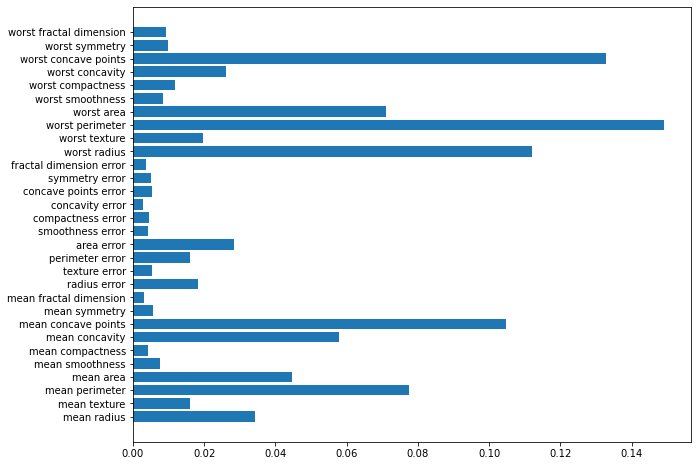

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(range(X.shape[1]), rfc.feature_importances_)
plt.yticks(range(X.shape[1]), cancer['feature_names'])
plt.show()

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0, learning_rate=1 ,max_depth=2)   #learning_rate : 학습율 보정
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(1.0, 0.965034965034965)

In [9]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,random_state=42)

In [10]:
fet = RandomForestClassifier(n_estimators=5,random_state=2)
fet.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

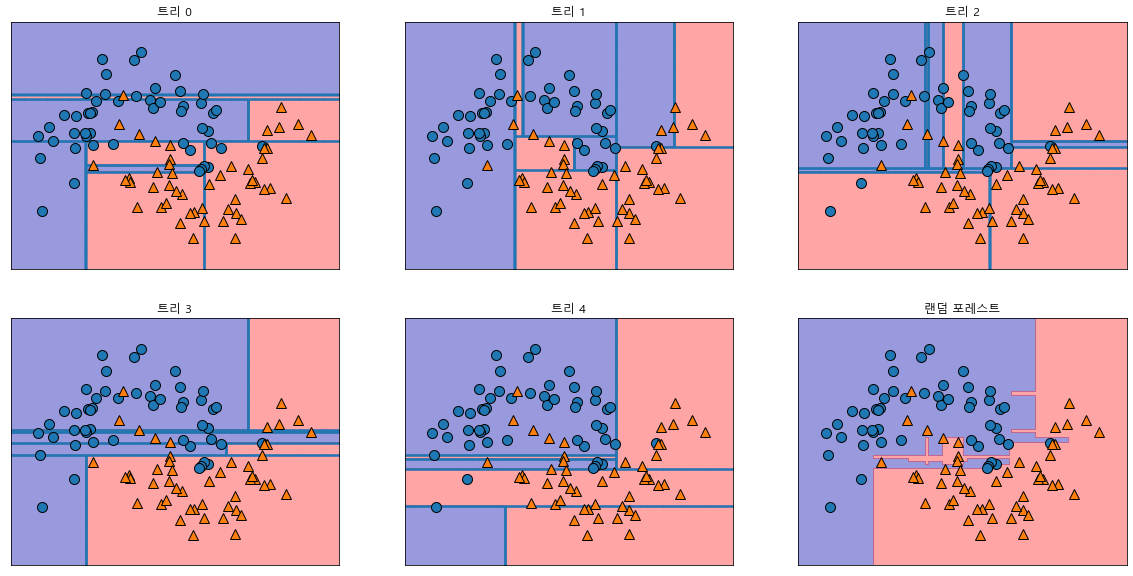

In [16]:
import mglearn
plt.rc('font', family="Malgun Gothic")
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), fet.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(fet, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0], X[:, 1],y)

plt.show()